<a href="https://colab.research.google.com/github/koksal100/Deep-Learning/blob/main/Custom_Layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
class ourDenseLayer(tf.keras.layers.Layer):
  def __init__(self, NumberOfNeurons=32):
    super(ourDenseLayer,self).__init__()
    self.NumberOfNeurons = NumberOfNeurons


  def build(self,input_shape):
    print("Build method is called")
    input_dim=input_shape[-1]
    print(f"there are {input_dim} features")
    self.w=self.add_weight(shape=(input_dim,self.NumberOfNeurons),initializer="random_normal",trainable=True)
    print("Shape of weights:", self.w.shape)
    self.b=self.add_weight(shape=(self.NumberOfNeurons,),initializer="zeros",trainable=True)
    print("end of build call")


  def call(self,inputs):
    print("Call method is called")
    y=tf.matmul(inputs,self.w)+self.b
    print(y.shape)
    return y

class ourModel(tf.keras.layers.Layer):
  def __init__(self,NumberOfLayers=4):
    super(ourModel,self).__init__()
    self.NumberOfLayers=NumberOfLayers


  def call(self,inputs):
    x=inputs
    for i in range(self.NumberOfLayers):
      print(f"Shape of the {i}. form: ",x.shape)
      x=ourDenseLayer(4**(self.NumberOfLayers-i-1))(x)
    return x


In [23]:
dLayer=ourDenseLayer(64)

In [24]:
dLayer.weights

[]

In [25]:
inputs=np.random.normal(size=2000).reshape(200,10)

In [26]:
inputs.shape

(200, 10)

In [27]:
dLayer(inputs)

Build method is called
there are 10 features
Shape of weights: (10, 64)
end of build call
Call method is called
(200, 64)


<tf.Tensor: shape=(200, 64), dtype=float32, numpy=
array([[ 0.03197064, -0.2587008 , -0.02867853, ...,  0.11185236,
        -0.13998726,  0.11825782],
       [-0.05107611, -0.07743689, -0.1006461 , ...,  0.06440202,
         0.04749211, -0.3351506 ],
       [-0.04740156,  0.22355327, -0.00766483, ...,  0.12759185,
         0.04336625,  0.1395579 ],
       ...,
       [ 0.02811913,  0.02257438, -0.35720447, ..., -0.19012263,
        -0.02833841,  0.04398722],
       [-0.03084328,  0.02593417,  0.08901595, ...,  0.22357568,
        -0.2738525 , -0.01493993],
       [-0.08362778, -0.03695856, -0.01347021, ...,  0.25409457,
        -0.02991494, -0.09036786]], dtype=float32)>

In [28]:
y=dLayer(inputs)

Call method is called
(200, 64)


In [29]:
y.shape

TensorShape([200, 64])

In [30]:
model=ourModel(5)

In [31]:
output=model(inputs)

Shape of the 0. form:  (200, 10)
Build method is called
there are 10 features
Shape of weights: (10, 256)
end of build call
Call method is called
(200, 256)
Shape of the 1. form:  (200, 256)
Build method is called
there are 256 features
Shape of weights: (256, 64)
end of build call
Call method is called
(200, 64)
Shape of the 2. form:  (200, 64)
Build method is called
there are 64 features
Shape of weights: (64, 16)
end of build call
Call method is called
(200, 16)
Shape of the 3. form:  (200, 16)
Build method is called
there are 16 features
Shape of weights: (16, 4)
end of build call
Call method is called
(200, 4)
Shape of the 4. form:  (200, 4)
Build method is called
there are 4 features
Shape of weights: (4, 1)
end of build call
Call method is called
(200, 1)


In [32]:
output.shape

TensorShape([200, 1])

In [60]:
class KoksalRelu(tf.keras.layers.Layer):
  def __init__(self,alpha):
    super(KoksalRelu,self).__init__()
    self.alpha=alpha
  def build(self, input_shape):
        super(KoksalRelu, self).build(input_shape)

  def call(self, inputs):
      return tf.maximum(float(0), float(self.alpha * inputs))

In [34]:
Köksal=KoksalRelu(0.16)


In [35]:
class KöksalTanh(tf.keras.layers.Layer):
  def __init__(self,alpha):
    super(KöksalTanh,self).__init__()
    self.alpha=alpha

  def build(self,input_shape):
    super(KöksalTanh,super).build(input_shape)

  def call(self,inputs):
    return tf.nn.tanh(inputs)

In [61]:
class ActivatedModel(tf.keras.models.Model):
    def __init__(self, activation=None, NumberOfLayers=4, outputDim=10):
        super(ActivatedModel, self).__init__()
        self.NumberOfLayers = NumberOfLayers
        self.outputDim = outputDim
        self.activation = activation
        self.dense_layers = [ourDenseLayer(int(4 ** (self.NumberOfLayers - i + 2))) for i in range(self.NumberOfLayers)]
        self.activation_layer = None
        if self.activation == "sigmoid":
            self.activation_layer = tf.keras.layers.Activation("sigmoid")
        elif self.activation == "softmax":
            self.activation_layer = tf.keras.layers.Activation("softmax")
        self.output_layer = ourDenseLayer(self.outputDim)

    def call(self, inputs):
        print("Call method has been called")
        x = inputs

        for i, layer in enumerate(self.dense_layers):
            print(f"Shape of the {i}. form: ", x.shape)
            x = layer(x)
            x = KoksalRelu(0.16)(x)

        print("----------------THE END OF THE LAYERS-------------")

        x = self.output_layer(x)
        print("OUTPUT LAYER HAS BEEN ADDED")

        if self.activation_layer:
            print(f"Activation function is {self.activation}")
            x = self.activation_layer(x)

        return x

In [41]:
activModel=ActivatedModel(activation="softmax",NumberOfLayers=5,outputDim=6)

In [42]:
inputs=np.random.normal(size=2000).reshape(200,10)

In [43]:
activModel(inputs)

Call method has been called
Shape of the 0. form:  (200, 10)
Build method is called
there are 10 features
Shape of weights: (10, 16384)
end of build call
Call method is called
(200, 16384)
Shape of the 1. form:  (200, 16384)
Build method is called
there are 16384 features
Shape of weights: (16384, 4096)
end of build call
Call method is called
(200, 4096)
Shape of the 2. form:  (200, 4096)
Build method is called
there are 4096 features
Shape of weights: (4096, 1024)
end of build call
Call method is called
(200, 1024)
Shape of the 3. form:  (200, 1024)
Build method is called
there are 1024 features
Shape of weights: (1024, 256)
end of build call
Call method is called
(200, 256)
Shape of the 4. form:  (200, 256)
Build method is called
there are 256 features
Shape of weights: (256, 64)
end of build call
Call method is called
(200, 64)
----------------THE END OF THE LAYERS-------------
Build method is called
there are 64 features
Shape of weights: (64, 6)
end of build call
Call method is ca

<tf.Tensor: shape=(200, 6), dtype=float32, numpy=
array([[0.16666983, 0.1666603 , 0.16666886, 0.16666149, 0.16667223,
        0.16666734],
       [0.16667426, 0.16665807, 0.16666791, 0.166652  , 0.16668037,
        0.16666737],
       [0.16667297, 0.16665955, 0.16666669, 0.16665559, 0.16667506,
        0.16667016],
       ...,
       [0.16666882, 0.16666153, 0.16666918, 0.1666549 , 0.16667652,
        0.16666906],
       [0.16667019, 0.16666384, 0.16666801, 0.16664971, 0.16668022,
        0.16666801],
       [0.16666746, 0.16666102, 0.16666935, 0.16665581, 0.16667733,
        0.16666901]], dtype=float32)>

In [44]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [45]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data.csv")

In [46]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [47]:
df=df.drop("Unnamed: 32",axis=1)

In [48]:
df=df.drop("id",axis=1)

In [49]:
numerical_df=pd.concat([df,pd.get_dummies(df["diagnosis"])],axis=1).drop("diagnosis",axis=1)

In [50]:
numerical_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,B,M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,1


In [51]:
x=numerical_df.drop(["B","M"],axis=1)
y=numerical_df[["B","M"]]

In [52]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [53]:
y

,B,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
564,0,1
565,0,1
566,0,1
567,0,1


In [54]:
y["B"].sum(),y["M"].sum()

(357, 212)

In [55]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [63]:
DiagnoseModel=ActivatedModel(activation="sigmoid",NumberOfLayers=5,outputDim=2)

In [64]:
DiagnoseModel.compile(loss="binary_crossentropy",
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])

In [65]:
DiagnoseModel.fit(x,y,epochs=5)

Epoch 1/5
Call method has been called
Shape of the 0. form:  (None, 30)
Build method is called
there are 30 features
Shape of weights: (30, 16384)
end of build call
Call method is called
(None, 16384)
Shape of the 1. form:  (None, 16384)
Build method is called
there are 16384 features
Shape of weights: (16384, 4096)
end of build call
Call method is called
(None, 4096)
Shape of the 2. form:  (None, 4096)
Build method is called
there are 4096 features
Shape of weights: (4096, 1024)
end of build call
Call method is called
(None, 1024)
Shape of the 3. form:  (None, 1024)
Build method is called
there are 1024 features
Shape of weights: (1024, 256)
end of build call
Call method is called
(None, 256)
Shape of the 4. form:  (None, 256)
Build method is called
there are 256 features
Shape of weights: (256, 64)
end of build call
Call method is called
(None, 64)
----------------THE END OF THE LAYERS-------------
Build method is called
there are 64 features
Shape of weights: (64, 2)
end of build ca

In [66]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [69]:
DiagnoseModelNew=ActivatedModel(activation="sigmoid",NumberOfLayers=5,outputDim=2)

In [70]:
DiagnoseModelNew.compile(loss="binary_crossentropy",
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])

In [82]:
history=DiagnoseModelNew.fit(X_train,y_train,validation_split=0.1,epochs=20,verbose=1)

Epoch 1/20
11/11 [==============================] - 1s 64ms/step - loss: 0.2249 - accuracy: 0.9094 - val_loss: 0.2396 - val_accuracy: 0.8974
Epoch 2/20
11/11 [==============================] - 0s 42ms/step - loss: 0.2189 - accuracy: 0.9035 - val_loss: 0.2432 - val_accuracy: 0.8974
Epoch 3/20
11/11 [==============================] - 0s 28ms/step - loss: 0.2437 - accuracy: 0.8947 - val_loss: 0.2384 - val_accuracy: 0.8974
Epoch 4/20
11/11 [==============================] - 0s 28ms/step - loss: 0.2422 - accuracy: 0.8947 - val_loss: 0.2434 - val_accuracy: 0.8974
Epoch 5/20
11/11 [==============================] - 0s 27ms/step - loss: 0.2405 - accuracy: 0.9006 - val_loss: 0.2305 - val_accuracy: 0.8974
Epoch 6/20
11/11 [==============================] - 0s 29ms/step - loss: 0.2174 - accuracy: 0.9181 - val_loss: 0.2752 - val_accuracy: 0.9231
Epoch 7/20
11/11 [==============================] - 0s 29ms/step - loss: 0.2336 - accuracy: 0.9006 - val_loss: 0.2785 - val_accuracy: 0.9231
Epoch 8/20
11

<Axes: >

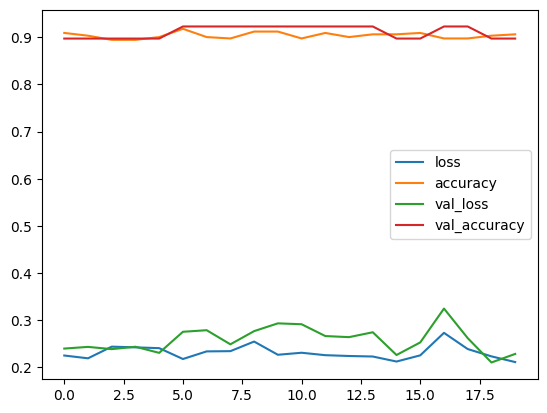

In [83]:
pd.DataFrame(history.history).plot()

In [73]:
predictions=DiagnoseModelNew.predict(X_test)

Call method has been called
Shape of the 0. form:  (None, 30)
Call method is called
(None, 16384)
Shape of the 1. form:  (None, 16384)
Call method is called
(None, 4096)
Shape of the 2. form:  (None, 4096)
Call method is called
(None, 1024)
Shape of the 3. form:  (None, 1024)
Call method is called
(None, 256)
Shape of the 4. form:  (None, 256)
Call method is called
(None, 64)
----------------THE END OF THE LAYERS-------------
Call method is called
(None, 2)
OUTPUT LAYER HAS BEEN ADDED
Activation function is sigmoid
6/6 [==============================] - 0s 4ms/step


In [74]:
from sklearn.metrics import mean_absolute_error

In [75]:
mean_absolute_error(y_test,predictions)

0.09688155

In [76]:

from sklearn.metrics import accuracy_score

In [77]:

y_test

,B,M
204,1,0
70,0,1
131,0,1
431,1,0
540,1,0
...,...,...
141,0,1
498,0,1
7,0,1
541,1,0


In [78]:
predictions.argmax(axis=1)

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0])

In [79]:
predictions.shape

(188, 2)

In [80]:
predictions[0]

array([0.56765443, 0.43074113], dtype=float32)

In [81]:
DiagnoseModelNew.evaluate(X_test,y_test)

Call method has been called
Shape of the 0. form:  (None, 30)
Call method is called
(None, 16384)
Shape of the 1. form:  (None, 16384)
Call method is called
(None, 4096)
Shape of the 2. form:  (None, 4096)
Call method is called
(None, 1024)
Shape of the 3. form:  (None, 1024)
Call method is called
(None, 256)
Shape of the 4. form:  (None, 256)
Call method is called
(None, 64)
----------------THE END OF THE LAYERS-------------
Call method is called
(None, 2)
OUTPUT LAYER HAS BEEN ADDED
Activation function is sigmoid
6/6 [==============================] - 0s 5ms/step - loss: 0.1282 - accuracy: 0.9628


[0.1281740963459015, 0.9627659320831299]